In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
N = 10000

In [65]:
ip = np.random.randn(N) > 0

In [66]:
s = 2 * ip - 1

In [67]:
eb_no_db = np.arange(5,30)

In [68]:
bit_error_ZF_DFE = np.zeros(len(eb_no_db))

bit_error_MMSE_DFE = np.zeros(len(eb_no_db))

bit_error_ZF = np.zeros(len(eb_no_db))

bit_error_MMSE = np.zeros(len(eb_no_db))

In [69]:
def ZF():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = (1/np.sqrt(2)) * np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian,H)
            
            H_hermitian_times_H_inverse = np.linalg.pinv(H_hermitian_times_H)
            
            W = np.dot(H_hermitian_times_H_inverse,H_hermitian)
            
            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_ZF[jj] = nErr/ N
        
        
        
    return bit_error_ZF 

In [70]:
def ZF_DFE():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = (1/np.sqrt(2)) * np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for zero forcing
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian,H)
            
            H_hermitian_times_H_inverse = np.linalg.pinv(H_hermitian_times_H)
            
            W = np.dot(H_hermitian_times_H_inverse,H_hermitian)
            
            x_hat = np.dot(W,y)
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            if Px1 > Px2 :
                
                h1 = np.array([[H[0,0]],[H[1,0]]]) #x1 travel channel
                
                h2 = np.array([[H[0,1]],[H[1,1]]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0]
                
                r = y - np.dot(h1,x1_hat)
                
                h2_conjugate = np.conjugate(h2)
                
                h2_hermitian = np.transpose(h2_conjugate)
                
                h2_hermitian_times_h2 = np.dot(h2_hermitian,h2)
                
                h2_hermitian_times_h2_inverse = np.linalg.pinv(h2_hermitian_times_h2)
                
                z = np.dot(h2_hermitian_times_h2_inverse,h2_hermitian)
                
                x2_hat = np.dot(z,r)
                
                m = x1_hat > 0
                
                n = x2_hat[0,0] > 0
                
                equalize_bits.append(m)
                
                equalize_bits.append(n)
                
            elif Px1 < Px2:
                
                h1 = np.array([[H[0,0]],[H[1,0]]]) #remaining channel after substract
                
                h2 = np.array([[H[0,1]],[H[1,1]]]) # x2 travel channel
                
                x2_hat = x_hat[1,0]
                
                
                r = y - np.dot(h2,x2_hat)
                
                h1_conjugate = np.conjugate(h1)
                
                h1_hermitian = np.transpose(h1)
                
                h1_hermitian_times_h1 = np.dot(h1_hermitian,h1)
                
                h1_hermitian_times_h1_inverse = np.linalg.pinv(h1_hermitian_times_h1)
                
                z = np.dot(h1_hermitian_times_h1_inverse,h1_hermitian)
                
                x1_hat = np.dot(z,r)
                
                m = x1_hat[0,0] > 0
                
                n = x2_hat > 0
                
                equalize_bits.append(m)
                
                equalize_bits.append(n)             
            
        nErr = np.sum(ip != equalize_bits)
        
        
        bit_error_ZF_DFE[jj] = nErr/ N
        
        
        
    return bit_error_ZF_DFE
    
    
                
                

In [71]:
def MMSE():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []
        
        for ii in range(N//2):
            
            h11 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h12 = (1/np.sqrt(2)) * (np.random.randn()+1j * np.random.randn())
            
            h21 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          
                        [h21, h22]])
            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1], 
                          [x2]]) 
            
            y = (1/np.sqrt(2)) * np.dot(H,x) + n * (10 ** (-eb_no_db[jj] / 20))
            
            # forming pseudo inverse for MMSE
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_hermitian_times_H_inverse = np.linalg.inv(H_hermitian_times_H + identity_matrix * snr_inverse)
            
            W = np.dot(H_hermitian_times_H_inverse,H_hermitian)
            
            x_hat = np.dot(W,y)
            
            received_bits = x_hat > 0
            
            m = received_bits[0,0]
            
            n = received_bits[1,0]
            
            equalize_bits.append(m)
            
            equalize_bits.append(n)
            
        nErr = np.sum(ip != equalize_bits)
        
       
        
        bit_error_MMSE[jj] = nErr/ N
        
        
        
    return bit_error_MMSE 

In [72]:
def MMSE_DFE():
    
    bit_error_MMSE_DFE = np.zeros(len(eb_no_db))

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        equalize_bits = []

        for ii in range(N // 2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h12 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h21 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            h22 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            H = np.array([[h11, h21],
                          [h21, h22]])

            n1 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n2 = (1 / np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())
            
            n = np.array([[n1],
                          [n2]])

            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            x = np.array([[x1],
                          [x2]])

            y = (1 / np.sqrt(2)) * np.dot(H, x) + n * (10 ** (-eb_no_db[jj] / 20))

            # Forming pseudo-inverse for MMSE
            
            H_conjugate = np.conjugate(H)
            
            H_hermitian = np.transpose(H_conjugate)
            
            H_hermitian_times_H = np.dot(H_hermitian, H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_hermitian_times_H_inverse = np.linalg.inv(H_hermitian_times_H + identity_matrix * snr_inverse)
            
            W = np.dot(H_hermitian_times_H_inverse, H_hermitian)
            
            x_hat = np.dot(W, y)

            Px1 = np.abs(h11) ** 2 + np.abs(h21) ** 2
            
            Px2 = np.abs(h12) ** 2 + np.abs(h22) ** 2

            if Px1 > Px2:
                
                h1 = np.array([[H[0, 0]], [H[1, 0]]])
                
                h2 = np.array([[H[0, 1]], [H[1, 1]]])

                x1_hat = x_hat[0, 0]
                
                r = y - np.dot(h1, x1_hat)
                
                h2_conjugate = np.conjugate(h2)
                
                h2_hermitian = np.transpose(h2_conjugate)
                
                h2_hermitian_times_h2 = np.dot(h2_hermitian, h2)

                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h2_hermitian_times_h2_snr = (h2_hermitian_times_h2 + identity_matrix * snr_inverse)
                
                h2_hermitian_times_h2_snr_inverse = np.linalg.inv(h2_hermitian_times_h2_snr)
                
                z = np.dot(h2_hermitian_times_h2_snr_inverse, h2_hermitian)
                
                x2_hat = np.dot(z, r)

                m = x1_hat > 0
                
                n = x2_hat[0, 0] > 0
                
                equalize_bits.append(m)
                
                equalize_bits.append(n)

            elif Px1 < Px2:
                
                h1 = np.array([[H[0, 0]], [H[1, 0]]])
                
                h2 = np.array([[H[0, 1]], [H[1, 1]]])

                x2_hat = x_hat[1, 0]
                
                r = y - np.dot(h2, x2_hat)
                
                h1_conjugate = np.conjugate(h1)
                
                h1_hermitian = np.transpose(h1_conjugate)
                
                h1_hermitian_times_h1 = np.dot(h1_hermitian, h1)

                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h1_hermitian_times_h1_snr = h1_hermitian_times_h1 + identity_matrix * snr_inverse
                
                h1_hermitian_times_h1_snr_inverse = np.linalg.inv(h1_hermitian_times_h1_snr)
                
                z = np.dot(h1_hermitian_times_h1_snr_inverse, h1_hermitian)
                
                x1_hat = np.dot(z, r)

                m = x1_hat[0, 0] > 0
                
                n = x2_hat > 0
                
                equalize_bits.append(m)
                
                equalize_bits.append(n)

        nErr = np.sum(ip != equalize_bits)
        
        bit_error_MMSE_DFE[jj] = nErr / N

    return bit_error_MMSE_DFE

                
                
                
                
                
                
    

[0.0906 0.0767 0.0599 0.0519 0.0404 0.0369 0.0263 0.0217 0.0187 0.0156
 0.0116 0.0085 0.0064 0.0053 0.0047 0.0041 0.0024 0.0018 0.0024 0.0014
 0.001  0.0011 0.0009 0.0009 0.0004]
[0.0939 0.0726 0.0659 0.0498 0.0451 0.0341 0.0262 0.0214 0.0174 0.0123
 0.0113 0.0097 0.0082 0.0057 0.0034 0.0035 0.0022 0.0023 0.0023 0.0014
 0.0013 0.0011 0.0014 0.0009 0.0006]
[0.0598 0.0448 0.0351 0.0317 0.0245 0.0211 0.0172 0.0125 0.0108 0.0081
 0.005  0.005  0.0035 0.0037 0.0028 0.0022 0.0013 0.0018 0.0011 0.0006
 0.0007 0.0002 0.0005 0.0005 0.0005]
[0.0601 0.0478 0.0368 0.0326 0.0245 0.0175 0.0165 0.0109 0.009  0.0087
 0.0061 0.0034 0.004  0.0028 0.0025 0.0013 0.0018 0.001  0.0011 0.0006
 0.0006 0.0003 0.0004 0.0002 0.0001]


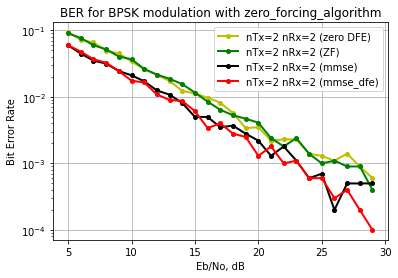

In [73]:
zf = ZF()
zf_dfe = ZF_DFE()
mmse = MMSE()
mmse_dfe = MMSE_DFE()
print(zf)
print(zf_dfe)
print(mmse)
print(mmse_dfe)
plt.figure()
plt.semilogy(eb_no_db, zf_dfe, 'yo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero DFE)')
plt.semilogy(eb_no_db, zf, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (ZF)')
plt.semilogy(eb_no_db, mmse, 'ko-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (mmse)')
plt.semilogy(eb_no_db, mmse_dfe, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (mmse_dfe)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()